In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boys = pd.read_csv('./Boys.csv', sep=';', index_col='ID')

In [3]:
boys.head()

,Name,NumberOfPersons,global_id,Year,Month
ID,,,,,
1,Александр,253,37750243,2015,январь
2,Михаил,247,37750244,2015,январь
3,Иван,226,37750245,2015,январь
4,Максим,208,37750246,2015,январь
5,Артём,190,37750247,2015,январь


In [4]:
girls = pd.read_csv('./Girls.csv', sep=';', index_col='ID')

In [5]:
girls.head()

,Name,NumberOfPersons,global_id,Year,Month
ID,,,,,
1,Мария,252,37750254,2015,январь
2,Анастасия,224,37750255,2015,январь
3,Анна,190,37750256,2015,январь
4,Варвара,190,37750257,2015,январь
5,Виктория,186,37750258,2015,январь


In [41]:
girl_names_amount = girls.groupby(by='Name').aggregate({'NumberOfPersons': 'sum'})
girl_names_amount.reset_index(inplace=True)
girl_names_amount['NameLastChar'] = girl_names_amount['Name'].apply(lambda name: name.strip()[-1])
girl_names_amount.sort_values('NumberOfPersons', inplace=True, ascending=False)
girl_names_amount['IsMale'] = 0

In [42]:
girl_names_amount

,Name,NumberOfPersons,NameLastChar,IsMale
119,Мария,16149,я,0
38,Анна,14389,а,0
58,Виктория,12438,я,0
19,Алиса,12033,а,0
32,Анастасия,11721,я,0
...,...,...,...,...
63,Галина,6,а,0
15,Аксинья,6,я,0
120,Мария,5,я,0
109,Луна,3,а,0


In [39]:
boy_names_amount = boys.groupby(by='Name').aggregate({'NumberOfPersons': 'sum'})
boy_names_amount.reset_index(inplace=True)
boy_names_amount['NameLastChar'] = boy_names_amount['Name'].apply(lambda name: name.strip()[-1])
boy_names_amount.sort_values('NumberOfPersons', inplace=True, ascending=False)
boy_names_amount['IsMale'] = 1

In [40]:
boy_names_amount

,Name,NumberOfPersons,NameLastChar,IsMale
10,Александр,17754,р,1
116,Михаил,15408,л,1
104,Максим,15407,м,1
32,Артём,13702,м,1
82,Иван,12891,н,1
...,...,...,...,...
183,Эмирхан,6,н,1
37,Ахмед,6,д,1
51,Гавриил,6,л,1
112,Микаил,5,л,1


In [45]:
children_names_amount = boy_names_amount.append(girl_names_amount).sort_values('NumberOfPersons', ascending=False)

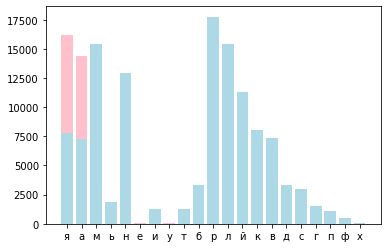

In [47]:
fig, axes = plt.subplots()
axes.bar(girl_names_amount['NameLastChar'], girl_names_amount['NumberOfPersons'], color='pink')
axes.bar(boy_names_amount['NameLastChar'], boy_names_amount['NumberOfPersons'], color='lightblue')
plt.show()

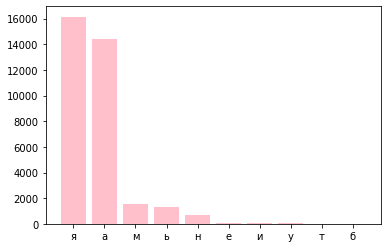

In [32]:
fig, axes = plt.subplots()
axes.bar(girl_names_amount['NameLastChar'], girl_names_amount['NumberOfPersons'], color='pink')
plt.show()

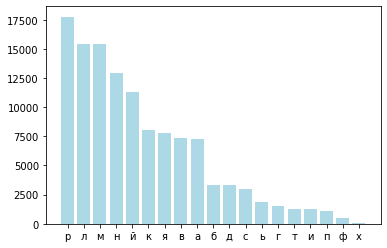

In [37]:
fig, axes = plt.subplots()
axes.bar(boy_names_amount['NameLastChar'], boy_names_amount['NumberOfPersons'], color='lightblue')
plt.show()

In [48]:
children_names_amount

,Name,NumberOfPersons,NameLastChar,IsMale
10,Александр,17754,р,1
119,Мария,16149,я,0
116,Михаил,15408,л,1
104,Максим,15407,м,1
38,Анна,14389,а,0
...,...,...,...,...
112,Микаил,5,л,1
120,Мария,5,я,0
109,Луна,3,а,0
128,Омар,3,р,1


In [75]:
def count_intersections(series):
    res = series.value_counts()
#     print(res)
    if len(res) == 1:
        return 0
    return res.min()

In [77]:
for i in range(1, 5):
    print('-------------')
    children_names_amount['NameLastChars'] = children_names_amount['Name'].apply(lambda name: name[-i:])
    intersections = children_names_amount.groupby('NameLastChars').agg({'IsMale': count_intersections})
    print(intersections[intersections['IsMale'] != 0])

-------------
i=1
               IsMale
NameLastChars        
а                  10
б                   1
и                   1
м                   3
н                   3
т                   1
ь                   4
я                   2
-------------
i=2
               IsMale
NameLastChars        
ам                  1
ат                  1
ва                  1
за                  1
ин                  3
ка                  1
ла                  3
ли                  1
ль                  3
ма                  1
ня                  1
са                  1
та                  1
фа                  1
ья                  1
-------------
i=3
               IsMale
NameLastChars        
ель                 1
ила                 2
ита                 1
лла                 1
лья                 1
мин                 2
-------------
i=4
Empty DataFrame
Columns: [IsMale]
Index: []


In [80]:
children_names_amount['NameLastChars'] = children_names_amount['Name'].apply(lambda name: name[-4:])
male, female = children_names_amount.groupby('IsMale')
if male[0] == 0:
    male, female = female, male

In [89]:
import pickle

with open('male_endings.pkl', 'wb') as f:
    male_endings = set(male[1]['NameLastChars'])
    pickle.dump(male_endings, f)
with open('female_endings.pkl', 'wb') as f:
    female_endings = set(female[1]['NameLastChars'])
    pickle.dump(female_endings, f)